In [2]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [3]:
floders = os.listdir("charecter")
array = []
count = 0
for floder in floders:
    for i in range(0, 30):
        path = "charecter/" + floder + "/"+ str(i) +".png"
        img = cv2.imread(path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        array.append(gray)
        count = count + 1


print("number of image: ", count)

#Label
label = []
countlabel = 0
for j in range(0, 48):
    for i in range(0, 30):
        label.append(i)
        countlabel = countlabel + 1

print("number of label: ", countlabel)

number of image:  1440
number of label:  1440


In [4]:
x = np.asarray(array)
y = np.asarray(label)

xTrain, xTest, yTrain, yTest = train_test_split(x, y , test_size = 0.2, random_state = 42)

print("X train: ", xTrain.shape)
print("y train: ", yTrain.shape)
print("X test: ", xTest.shape)
print("y test: ", yTest.shape)

xTain = xTrain.astype('float32') / 255.0
xTest = xTest.astype('float32') / 255.0

X train:  (1152, 32, 32)
y train:  (1152,)
X test:  (288, 32, 32)
y test:  (288,)


In [5]:
model = Sequential()

model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape = (32,32,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(30, activation='softmax'))
model.summary()
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dropout (Dropout)           (None, 10816)             0         
                                                        

In [6]:
# Train the model
#no batch_size
model.fit(xTrain, yTrain, epochs=20)
model.evaluate(xTest, yTest)

Epoch 1/20
36/36 [==============================] - 3s 82ms/step - loss: 9.8772 - accuracy: 0.4479
Epoch 2/20
36/36 [==============================] - 3s 74ms/step - loss: 0.3056 - accuracy: 0.9089
Epoch 3/20
36/36 [==============================] - 3s 73ms/step - loss: 0.1277 - accuracy: 0.9583
Epoch 4/20
36/36 [==============================] - 2s 68ms/step - loss: 0.0917 - accuracy: 0.9705
Epoch 5/20
36/36 [==============================] - 2s 66ms/step - loss: 0.0372 - accuracy: 0.9870
Epoch 6/20
36/36 [==============================] - 2s 67ms/step - loss: 0.0239 - accuracy: 0.9939
Epoch 7/20
36/36 [==============================] - 2s 65ms/step - loss: 0.0124 - accuracy: 0.9957
Epoch 8/20
36/36 [==============================] - 2s 64ms/step - loss: 0.0134 - accuracy: 0.9948
Epoch 9/20
36/36 [==============================] - 2s 64ms/step - loss: 0.0271 - accuracy: 0.9913
Epoch 10/20
36/36 [==============================] - 2s 64ms/step - loss: 0.0325 - accuracy: 0.9887
Epoch 11/

[3.258723258972168, 0.9756944179534912]

In [28]:
predict = model.predict(xTest)

9/9 [==============================] - 0s 11ms/step


In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [29]:
#np.argmax(predict[0])
a = []

for i in predict:
    list(i)
    arg = np.argmax(i)
    a.append(arg)
print("accuracy: {}".format(accuracy_score(yTest, a)))

accuracy: 0.9791666666666666


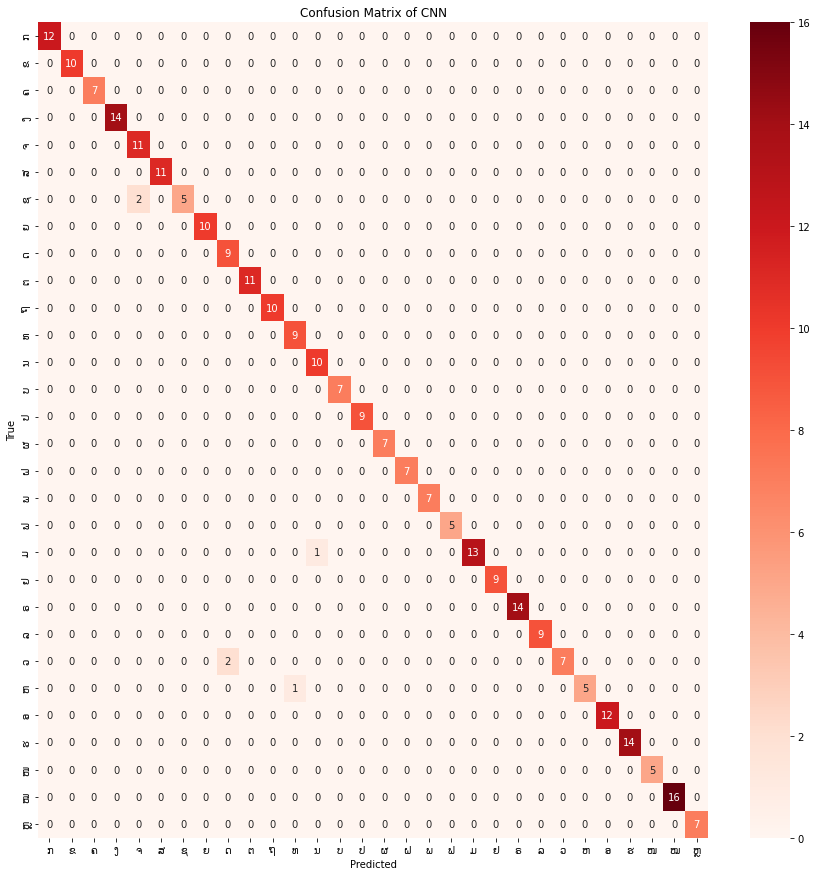

In [30]:
import seaborn as sns

confu = confusion_matrix(yTest, a)
la = ["ກ", "ຂ", "ຄ", "ງ", "ຈ", "ສ", "ຊ", "ຍ", "ດ", "ຕ", "ຖ", "ທ", "ນ", "ບ", "ປ", "ຜ",
 "ຝ", "ພ", "ຟ", "ມ","ຢ", "ຣ", "ລ", "ວ", "ຫ", "ອ", "ຮ", "ໜ", "ໝ", "ຫຼ"]
conf_matrix = confu

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels= la, yticklabels = la, ax = ax)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of CNN")


plt.show()